# Introduction

My goal with this project is to deeply understand the dynamics of the stock market and provide insights that help investors make more informed decisions. By analyzing 20 years of historical Google stock data, I aim to uncover trends, measure volatility, and predict future price movements using advanced machine learning techniques. This analysis is designed to deliver actionable insights that enhance investment and trading strategies.

In [2]:
# Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Models and Evaluation
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Deep Learning (Neural Networks and LSTM)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from scikeras.wrappers import KerasRegressor

# Time Series Analysis (Optional)
import yfinance as yf
from datetime import datetime, timedelta

In [3]:
data = pd.read_csv(r'C:\Users\Elif Surucu\Documents\Flatiron\Assesments\Project4\Google-Stock-Market-Data\data.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Volatility,Month,Volume_Category
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216,2004,0.201743,8,Very High
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488,2004,0.213699,8,Very High
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939,2004,0.110336,8,Very High
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159,2004,0.200000,8,Very High
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512,2004,0.102616,8,Very High


In [ ]:
# Data Cleaning
data['Date'] = pd.to_datetime(data['Date'])
data = data.drop_duplicates()
data['Volatility'] = data['High'] - data['Low']
data['Month'] = data['Date'].dt.month

In [7]:
# Feature Engineering: Adding day of the week
data['DayOfWeek'] = data['Date'].dt.day_name()
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4936 entries, 0 to 4935
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             4936 non-null   datetime64[ns]
 1   Open             4936 non-null   float64       
 2   High             4936 non-null   float64       
 3   Low              4936 non-null   float64       
 4   Close            4936 non-null   float64       
 5   Adj Close        4936 non-null   float64       
 6   Volume           4936 non-null   int64         
 7   Year             4936 non-null   int64         
 8   Volatility       4936 non-null   float64       
 9   Month            4936 non-null   int32         
 10  Volume_Category  4936 non-null   object        
 11  DayOfWeek        4936 non-null   object        
dtypes: datetime64[ns](1), float64(6), int32(1), int64(2), object(2)
memory usage: 443.6+ KB
None


In [8]:
data.describe()

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Volatility,Month
count,4936,4936.000000,4936.000000,4936.000000,4936.000000,4936.000000,4.936000e+03,4936.000000,4936.000000,4936.000000
mean,2014-06-07 17:09:49.303079424,43.077417,43.532659,42.644088,43.096952,43.096952,1.174059e+08,2013.930308,0.888572,6.560981
min,2004-08-19 00:00:00,2.470490,2.534002,2.390042,2.490913,2.490913,1.584340e+05,2004.000000,0.038605,1.000000
25%,2009-07-14 18:00:00,12.923497,13.048528,12.787071,12.922438,12.922438,2.803600e+07,2009.000000,0.236364,4.000000
50%,2014-06-09 12:00:00,26.795184,26.966079,26.570000,26.763133,26.763133,5.875273e+07,2014.000000,0.421421,7.000000
75%,2019-05-03 18:00:00,58.855251,59.352863,58.164000,58.788999,58.788999,1.453859e+08,2019.000000,1.108998,10.000000
max,2024-03-28 00:00:00,154.009995,155.199997,152.919998,154.839996,154.839996,1.650833e+09,2024.000000,9.215500,12.000000
std,NaN,40.320485,40.773849,39.917290,40.352092,40.352092,1.505185e+08,5.672880,1.057015,3.453135


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4936 entries, 0 to 4935
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             4936 non-null   datetime64[ns]
 1   Open             4936 non-null   float64       
 2   High             4936 non-null   float64       
 3   Low              4936 non-null   float64       
 4   Close            4936 non-null   float64       
 5   Adj Close        4936 non-null   float64       
 6   Volume           4936 non-null   int64         
 7   Year             4936 non-null   int64         
 8   Volatility       4936 non-null   float64       
 9   Month            4936 non-null   int32         
 10  Volume_Category  4936 non-null   object        
 11  DayOfWeek        4936 non-null   object        
dtypes: datetime64[ns](1), float64(6), int32(1), int64(2), object(2)
memory usage: 443.6+ KB


In [10]:
print(data.isnull().sum())

print(data.describe())

Date               0
Open               0
High               0
Low                0
Close              0
Adj Close          0
Volume             0
Year               0
Volatility         0
Month              0
Volume_Category    0
DayOfWeek          0
dtype: int64
                                Date         Open         High          Low  \
count                           4936  4936.000000  4936.000000  4936.000000   
mean   2014-06-07 17:09:49.303079424    43.077417    43.532659    42.644088   
min              2004-08-19 00:00:00     2.470490     2.534002     2.390042   
25%              2009-07-14 18:00:00    12.923497    13.048528    12.787071   
50%              2014-06-09 12:00:00    26.795184    26.966079    26.570000   
75%              2019-05-03 18:00:00    58.855251    59.352863    58.164000   
max              2024-03-28 00:00:00   154.009995   155.199997   152.919998   
std                              NaN    40.320485    40.773849    39.917290   

             Close    A

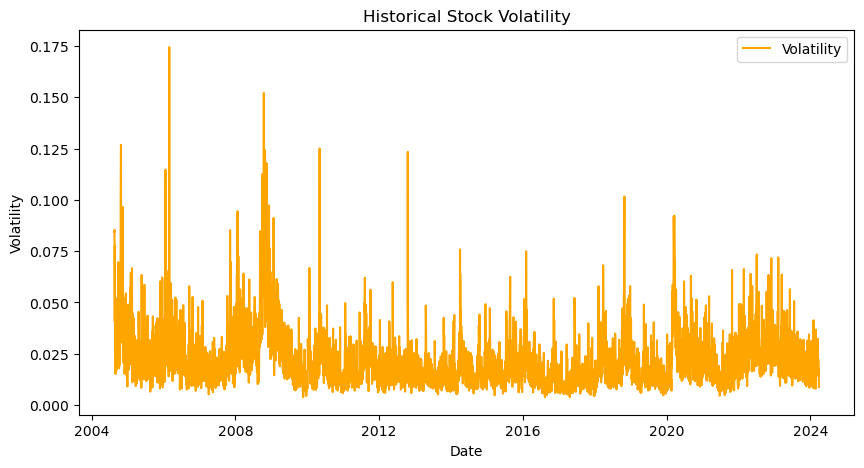

In [11]:
data['Volatility'] = (data['High'] - data['Low']) / data['Low']

plt.figure(figsize=(10, 5))
plt.plot(data['Date'], data['Volatility'], label='Volatility', color='orange')
plt.title('Historical Stock Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()


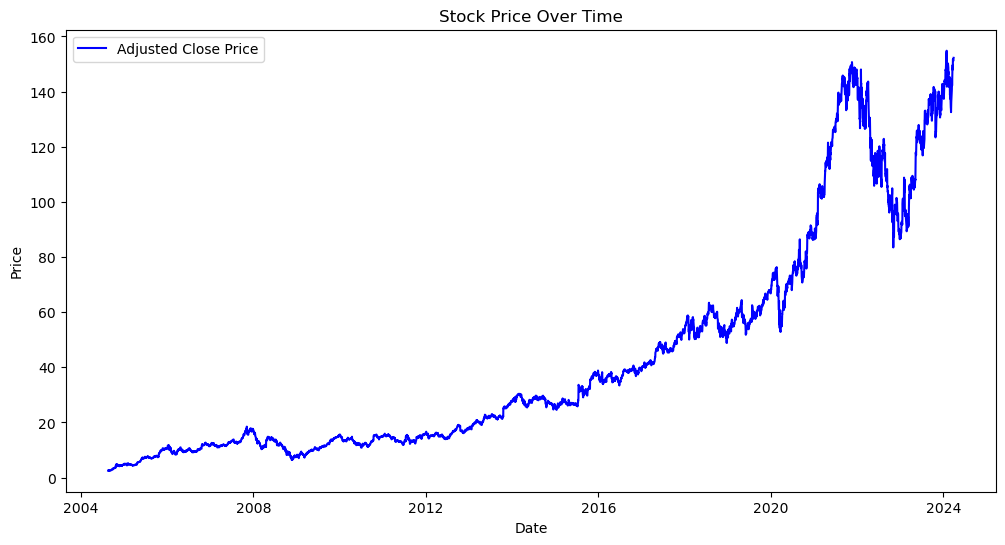

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Adj Close'], label='Adjusted Close Price', color='blue')
plt.title('Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [13]:
from sklearn.model_selection import train_test_split

# MinMaxScaler ile ölçekleme
scaler = MinMaxScaler()
data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']] = scaler.fit_transform(
    data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]
)

# Eğitim ve test setlerini ayırma
X = data[['Open', 'High', 'Low', 'Volume']]
y = data['Adj Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'KNN': KNeighborsRegressor(n_neighbors=5)
}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} - R^2: {r2_score(y_test, y_pred):.2f}, MSE: {mean_squared_error(y_test, y_pred):.2f}")

Linear Regression - R^2: 1.00, MSE: 0.00
Random Forest - R^2: 1.00, MSE: 0.00
KNN - R^2: 1.00, MSE: 0.00


In [20]:
from sklearn.model_selection import GridSearchCV

# Random Forest için hiperparametre ayarı
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("En iyi parametreler:", grid_search.best_params_)
best_model = grid_search.best_estimator_


En iyi parametreler: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


In [21]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Modeli oluşturma
nn_model = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='linear')
])

nn_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
history = nn_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Performansı değerlendirme
y_pred_nn = nn_model.predict(X_test)
print(f"Neural Network - R^2: {r2_score(y_test, y_pred_nn):.2f}")


Epoch 1/50
99/99 [==============================] - 2s 6ms/step - loss: 0.0164 - mae: 0.0689 - val_loss: 1.8873e-04 - val_mae: 0.0094
Epoch 2/50
99/99 [==============================] - 0s 4ms/step - loss: 0.0033 - mae: 0.0334 - val_loss: 2.2488e-04 - val_mae: 0.0113
Epoch 3/50
99/99 [==============================] - 0s 3ms/step - loss: 0.0025 - mae: 0.0289 - val_loss: 1.2741e-04 - val_mae: 0.0072
Epoch 4/50
99/99 [==============================] - 0s 4ms/step - loss: 0.0024 - mae: 0.0282 - val_loss: 3.8951e-05 - val_mae: 0.0046
Epoch 5/50
99/99 [==============================] - 0s 3ms/step - loss: 0.0022 - mae: 0.0267 - val_loss: 1.7124e-04 - val_mae: 0.0082
Epoch 6/50
99/99 [==============================] - 0s 4ms/step - loss: 0.0020 - mae: 0.0249 - val_loss: 5.3606e-05 - val_mae: 0.0057
Epoch 7/50
99/99 [==============================] - 0s 3ms/step - loss: 0.0018 - mae: 0.0236 - val_loss: 4.4251e-05 - val_mae: 0.0049
Epoch 8/50
99/99 [==============================] - 0s 3ms/ste

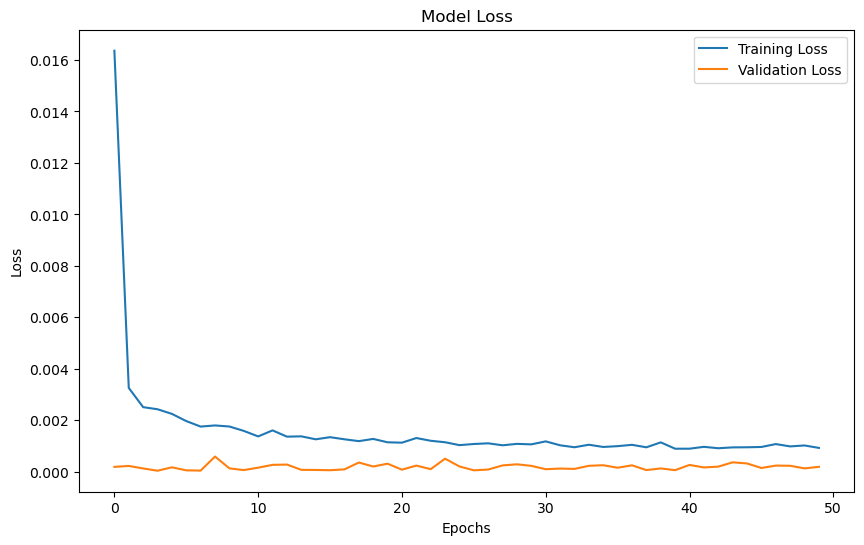

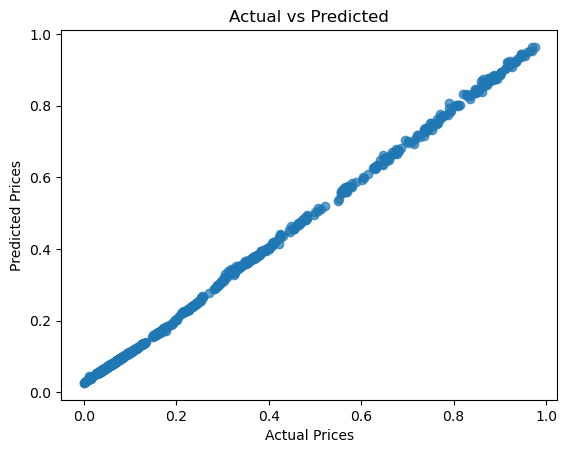

In [22]:
# Eğitim ve doğrulama kayıplarını görselleştirme
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Tahmin sonuçlarını görselleştirme
plt.scatter(y_test, y_pred_nn, alpha=0.7)
plt.title('Actual vs Predicted')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()
